## LP-V: Deep Learning
## Assignment 03 (Group 1)



### Step # 1 - Import Libraries
---
Lets import all the libraries we are going to require for this classification project. It is always good to put all the import statements at the begining of the file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

### Step # 2 - Load Data
---
Now lets use **pandas** library to read the train and test datasets in the respective csv files. We are going to use the **read_csv** function which reads a csv file and returns a pandas **DataFrame** object.

In [5]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have loaded the datasets, lets check some parameters about the datasets.

In [9]:
fashion_train_df.shape   # Shape of the dataset

(60000, 785)

In [10]:
fashion_train_df.columns   # Name of the columns of the DataSet.

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

So we can see that the 1st column is the label or target value for each row.

Now Lets find out how many distinct lables we have.

In [11]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


So we have 10 different lables. from 0 to 9. 

Now lets find out what is the min and max of values of in the other columns.

In [12]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0, 255]


So we have 0 to 255 which is the color values for grayscale. 0 being white and 255 being black.

Now lets check some of the rows in tabular format

In [13]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So evry other things of the test dataset are going to be the same as the train dataset except the shape.

In [14]:
fashion_test_df.shape

(10000, 785)

So here we have 10000 images instead of 60000 as in the train dataset.

Lets check first few rows.

In [15]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step # 3 - Visualization
---
Now that we have loaded the data and also got somewhat acquainted with it lets visualize the actual images. We are going to use **Matplotlib** library for this. 

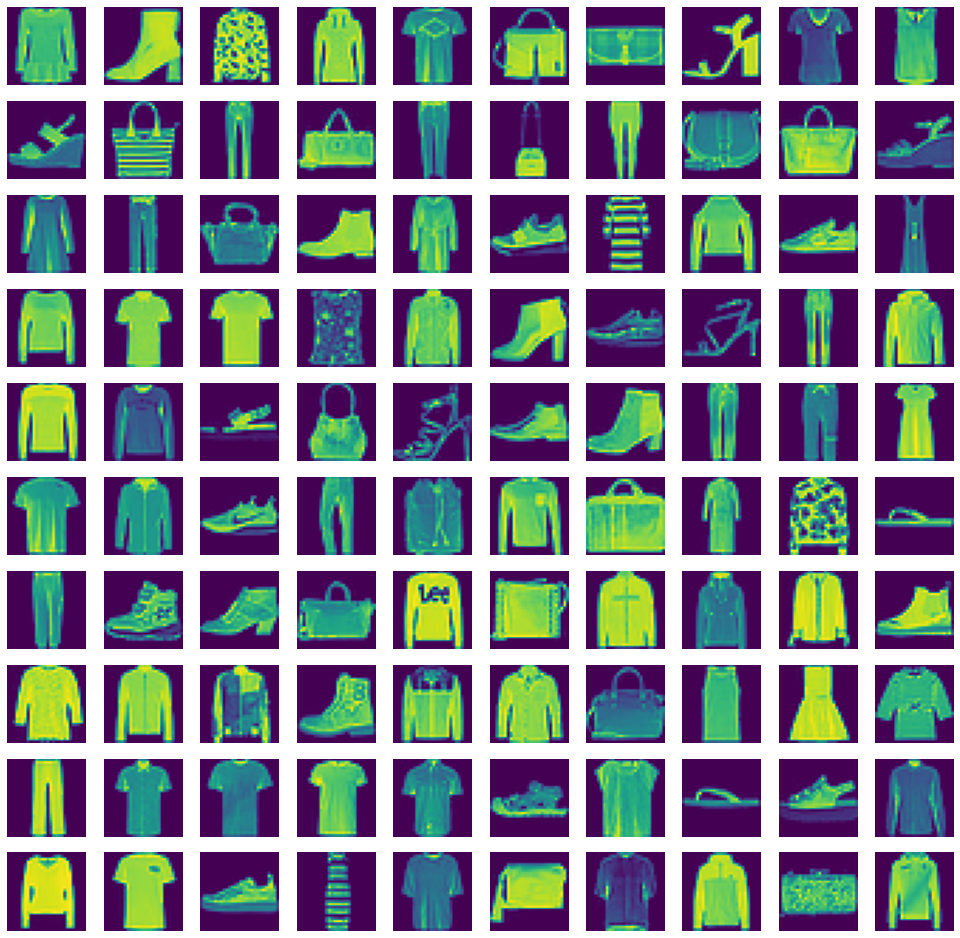

In [23]:
# Convert the dataframe ti numpy array
training = np.asarray(fashion_train_df, dtype='float32')

# Lets show multiple images in a 15x15 grid
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
#     axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
# plt.subplots_adjust(hspace=0.5)
plt.show()

### Step # 4 - Preprocess Data
---
Great! We have visualized the images. So now we can start preparing for creating our model. But before that we need to preprocess our data so that we can fit our model easily. Lets do that first.

Since we are dealing with image data and our task is to recognize and classify images our model should be a Convolutional Neural Network. For that our images should have atleast 3 dimensions (**height** x **width** x **color_channels**). But our images are flattened in one dimension, **784 pixel (28x28x1)** values per row. So we need to reshape the data into its original format.

In [31]:
# convert to numpy arrays and reshape
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   # Normalizing the data
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    # Normalizing the data
y_test = testing[:, 0]

Also we need to have three different sets of data for **training, validatin** and **testing**. We already have different sets for training and testing. So we are going to split the training dataset further into two sets and will use one set of training and the other for validation.

In [32]:
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)    # TODO : change the random state to 5

In [33]:
# Lets check the shape of all three datasets
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


### Step # 5 - Create and Train the Model
---
**Create the model**

In [34]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

The code snippet you provided demonstrates the construction of a Convolutional Neural Network (CNN) model using the Keras library with a TensorFlow backend. Let's break down the code line by line:

1. `cnn_model = Sequential()`: This creates a sequential model object. A sequential model is a linear stack of layers, allowing you to build the model layer by layer.

2. `cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))`: This adds a 2D convolutional layer to the model. The `Conv2D` layer performs convolutions on the input data. In this line, the layer has 64 filters, a kernel size of (3,3), an input shape of (28,28,1) (representing a grayscale image with dimensions 28x28), and uses the ReLU activation function.

3. `cnn_model.add(MaxPooling2D(pool_size = (2,2)))`: This adds a max pooling layer to the model. The `MaxPooling2D` layer reduces the spatial dimensions of the input data by taking the maximum value within a pool size. Here, a pool size of (2,2) is used, which downsamples the input by a factor of 2 in both dimensions.

4. `cnn_model.add(Dropout(rate=0.3))`: This adds a dropout layer to the model. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training, which helps prevent overfitting. Here, a dropout rate of 0.3 is used, meaning 30% of the input units will be set to 0 during training.

5. `cnn_model.add(Flatten())`: This adds a flatten layer to the model. The `Flatten` layer flattens the multidimensional input into a 1D array, preparing it for input to the fully connected layers.

6. `cnn_model.add(Dense(units=32, activation='relu'))`: This adds a fully connected layer to the model. The `Dense` layer is a standard fully connected layer, where each neuron is connected to every neuron in the previous layer. Here, the layer has 32 units and uses the ReLU activation function.

7. `cnn_model.add(Dense(units=10, activation='sigmoid'))`: This adds another fully connected layer to the model. The output layer has 10 units, representing the number of classes in the classification task. The activation function used here is the sigmoid function, which outputs probabilities for each class.

Overall, this code constructs a CNN model for image classification. It starts with convolutional and pooling layers to extract features from the input images, followed by dropout and fully connected layers for further processing and classification. The final output layer uses sigmoid activation to provide probabilities for each class.

**compile the model**

In [35]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                346144    
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                      

**Train the model**

In [36]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
94/94 [==============================] - 31s 319ms/step - loss: 0.7136 - accuracy: 0.7641 - val_loss: 0.4622 - val_accuracy: 0.8372
Epoch 2/50
94/94 [==============================] - 28s 303ms/step - loss: 0.4218 - accuracy: 0.8530 - val_loss: 0.4044 - val_accuracy: 0.8567
Epoch 3/50
94/94 [==============================] - 30s 320ms/step - loss: 0.3734 - accuracy: 0.8683 - val_loss: 0.3658 - val_accuracy: 0.8680
Epoch 4/50
94/94 [==============================] - 31s 326ms/step - loss: 0.3377 - accuracy: 0.8820 - val_loss: 0.3242 - val_accuracy: 0.8874
Epoch 5/50
94/94 [==============================] - 27s 287ms/step - loss: 0.3164 - accuracy: 0.8882 - val_loss: 0.3031 - val_accuracy: 0.8967
Epoch 6/50
94/94 [==============================] - 27s 287ms/step - loss: 0.3020 - accuracy: 0.8946 - val_loss: 0.2996 - val_accuracy: 0.8942
Epoch 7/50
94/94 [==============================] - 27s 287ms/step - loss: 0.2927 - accuracy: 0.8973 - val_loss: 0.2959 - val_accuracy: 0.8959

### Step # 5 - Evaluate the Model
---
**Get the accuracy of the model**

In [17]:
eval_result = cnn_model.evaluate(X_test, y_test)
print("Accuracy : {:.3f}".format(eval_result[1]))

10000/10000 [==============================] - 1s 55us/step
Accuracy : 0.918


**Visualize the model's predictions**

In [18]:
y_pred = cnn_model.predict_classes(x=X_test)

In [ ]:
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

# # Let us plot the predictions, red means incorrect while blue means correct prediction.
# rows = 5
# cols = 3
# total_images = rows * cols
# plt.figure(figsize = (10, 10))
# for i in range(total_images):
#   plt.subplot(rows, cols, i + 1)
#   plot_image(i, y_pred[i], x_test, y_test)
# plt.tight_layout()
# plt.show()

**Plot Confusin Matrix**

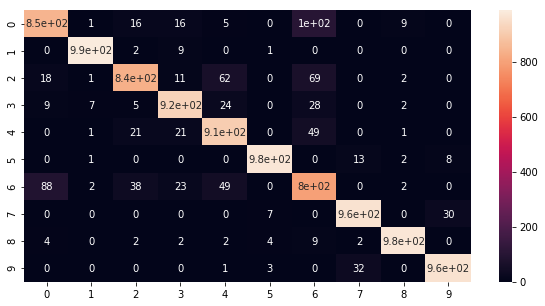

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

**Classification Report**

In [21]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.88      0.85      0.86      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.91      0.84      0.87      1000
     class 3       0.92      0.93      0.92      1000
     class 4       0.86      0.91      0.88      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.75      0.80      0.78      1000
     class 7       0.95      0.96      0.96      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.96      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

